
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of stocks from the S&P 400.  Construct portfolios from the 400 stocks in the S&P 400 mid cap index and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['sp400-galaxy']
risk_free_rate = 0
annual_returns = '3 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,AA,Alcoa,US Stocks:Materials,-89.11,-10.66,15.40,-13.06,12.97,36.82,29.69,58.17,-13.06,-759.70
1,AAL,American Airlines Group,US Stocks:Industrials,516.01,527.74,26.49,-1.98,-9.62,63.01,14.31,41.06,-1.98,-81.30
2,AAON,AAON,US Stocks:Industrials,-74.79,45.86,60.07,31.08,29.75,35.18,27.94,38.95,31.08,0.80
3,ACHC,Acadia Healthcare,US Stocks:Healthcare,-39.61,-76.89,-47.90,-11.97,4.29,23.26,12.11,36.73,-11.97,-439.66
4,ACM,AECOM,US Stocks:Industrials,-63.67,19.26,17.47,12.41,20.33,12.58,11.02,22.48,12.41,0.55
5,ADC,Agree Realty,US Stocks:Real Estate,-59.70,-24.25,14.62,3.91,4.31,18.45,13.18,18.22,3.91,0.21
6,AFG,American Financial Group,US Stocks:Financials,-51.79,4.14,18.48,6.38,14.69,15.73,11.03,21.47,6.38,0.30
7,AGCO,AGCO,US Stocks:Industrials,-71.91,-25.03,-22.87,-3.66,6.83,27.47,17.53,34.29,-3.66,-125.50
8,AIT,Applied Industrial Technologies,US Stocks:Industrials,-80.05,33.10,40.88,33.03,30.60,16.75,14.79,26.09,33.03,1.27
9,ALE,ALLETE,US Stocks:Utilities,1.12,4.11,7.86,3.55,-0.38,4.29,2.67,21.43,3.55,0.17


In [6]:
# Rank
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Subclass', num_per_group=1)
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered = rank_filtered.head(20)
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
256,OGE,OGE Energy,US Stocks:Utilities,-34.65,4.97,22.13,7.43,3.29,14.52,12.01,18.05,7.43,0.41
141,FLEX,Flex Ltd.,US Stocks:Technology,-16.89,95.28,69.14,40.83,32.35,18.90,8.75,32.00,40.83,1.28
258,OHI,Omega Healthcare Investors,US Stocks:Real Estate,-45.09,-14.64,32.82,18.75,6.64,14.89,12.27,25.03,18.75,0.75
199,KNF,Knife River Corporation,US Stocks:Materials,-20.70,68.50,56.44,56.44,56.44,37.00,18.30,28.06,56.44,2.01
117,EME,Emcor,US Stocks:Industrials,-69.40,28.70,115.66,53.45,40.01,25.14,21.79,31.97,53.45,1.67
175,HQY,HealthEquity,US Stocks:Healthcare,-44.38,124.38,46.30,30.07,5.65,31.67,22.39,30.92,30.07,0.97
359,UNM,Unum,US Stocks:Financials,-42.30,131.18,64.34,48.31,25.52,17.36,12.92,28.59,48.31,1.69
110,DTM,DT Midstream,US Stocks:Energy,3.93,150.42,92.23,34.98,34.98,31.21,17.82,24.06,34.98,1.45
317,SFM,Sprouts Farmers Market,US Stocks:Consumer Staples,-78.14,108.19,171.13,64.17,46.74,33.27,20.45,31.44,64.17,2.04
237,MUSA,Murphy USA,US Stocks:Consumer Discretionary,-67.74,9.38,38.07,36.13,33.85,19.57,14.71,26.80,36.13,1.35


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Ranked Portfolio'
}
top10 = list(rank_filtered['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'DS Vola'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,OGE,FLEX,OHI,KNF,EME,HQY,UNM,DTM,SFM,MUSA,TKO,Ranked Portfolio
Annual Returns,7.43,40.83,18.75,56.44,53.45,30.07,48.31,34.98,64.17,36.13,44.60,37.70
Std Dev,18.05,32.00,25.03,28.06,31.97,30.92,28.59,24.06,31.44,26.80,30.41,19.41
Sharpe Ratio,0.41,1.28,0.75,2.01,1.67,0.97,1.69,1.45,2.04,1.35,1.47,1.94
Weight,0.11,0.15,0.11,0.07,0.06,0.06,0.10,0.08,0.07,0.09,0.09,1.00
Worst Typical Down Year,-28.67,-23.17,-31.31,0.32,-10.49,-31.77,-8.87,-13.14,1.29,-17.47,-16.22,-1.11
Black Swan,-46.72,-55.17,-56.34,-27.74,-42.46,-62.69,-37.46,-37.20,-30.15,-44.27,-46.63,-20.52


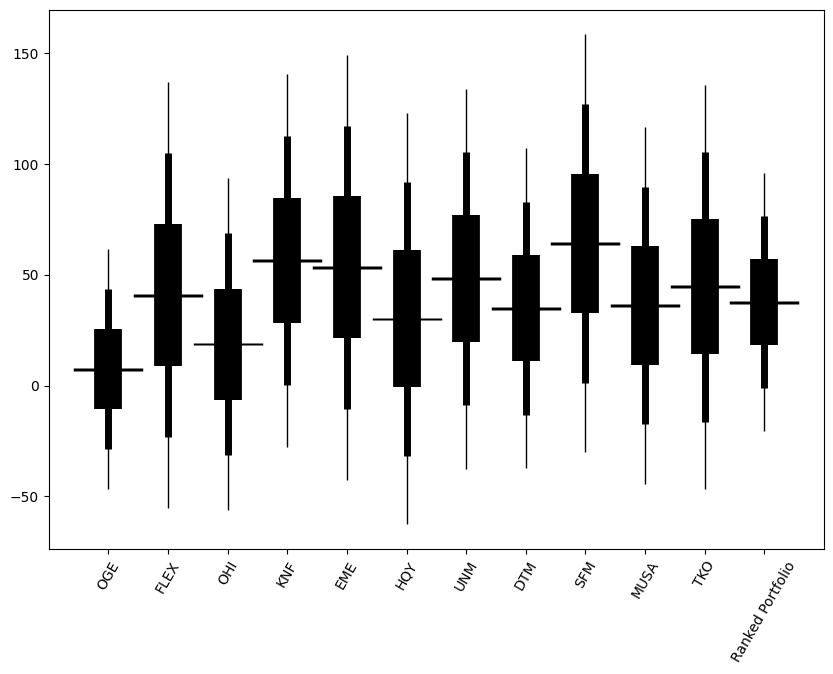

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

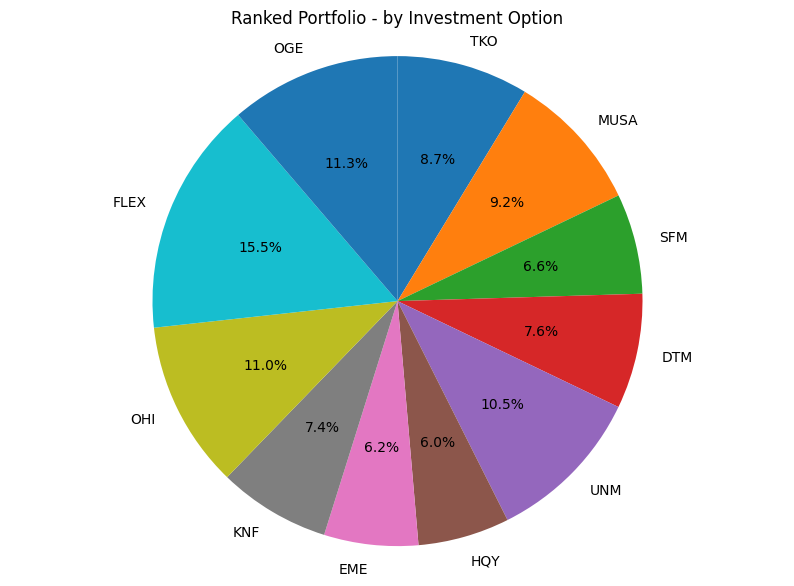

TKO    0.09
MUSA   0.09
SFM    0.07
DTM    0.08
UNM    0.10
HQY    0.06
EME    0.06
KNF    0.07
OHI    0.11
FLEX   0.15
OGE    0.11



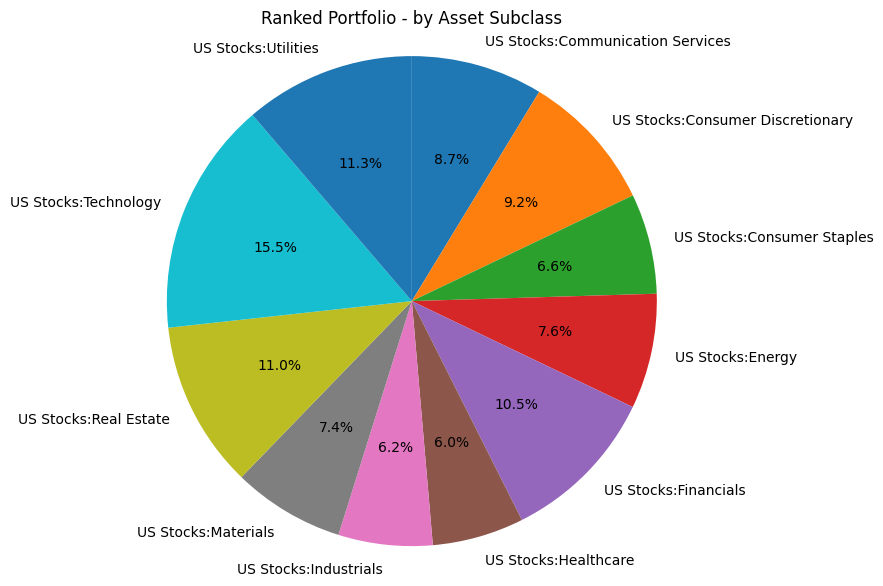

US Stocks:Communication Services   0.09
US Stocks:Consumer Discretionary   0.09
US Stocks:Consumer Staples         0.07
US Stocks:Energy                   0.08
US Stocks:Financials               0.10
US Stocks:Healthcare               0.06
US Stocks:Industrials              0.06
US Stocks:Materials                0.07
US Stocks:Real Estate              0.11
US Stocks:Technology               0.15
US Stocks:Utilities                0.11



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Subclass'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    OGE                            0.1127
    FLEX                           0.1547
    OHI                            0.1103
    KNF                            0.0739
    EME                            0.0621
    HQY                            0.0604
    UNM                            0.1047
    DTM                            0.0759
    SFM                            0.0662
    MUSA                           0.0920
    TKO                            0.0870


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer...............

Ranked Portfolio Metrics:           
    max_sharpe_ratio            2.47
    annual_return              48.41
    std_dev                    19.59
    worst typical down year     9.22
    black_swan                -10.37


Ranked Portfolio Weights:
    OGE                            0.0000
    FLEX                           0.0800
    OHI                            0.0300
    KNF                            0.1400
    EME                            0.0000
    HQY                            0.0000
    UNM                            0.1600
    DTM                            0.2200
    SFM                            0.2600
    MUSA                           0.0400
    TKO                            0.0700



### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).